In [ ]:
# 코렙에서 한글 깨짐

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

# 대중교통 데이터 읽어오기

In [ ]:
import csv

f=open('/content/drive/MyDrive/KDT AI, 빅데이터 전문가 양성과정/data/공공데이터/07_29/subwayfee.csv', encoding='utf-8-sig')
data=csv.reader(f)
header=next(data)
print(header)
i=1
for row in data:
  print(row)
  if i>5:
    break
  i+=1
f.close()

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
['Jun.24', '1호선', '150', '서울역', '1375235 ', '1312172 ', '217760 ', '208410 ']
['Jun.24', '1호선', '151', '시청', '623388 ', '630661 ', '97573 ', '95530 ']
['Jun.24', '1호선', '152', '종각', '914353 ', '912364 ', '146932 ', '137905 ']
['Jun.24', '1호선', '153', '종로3가', '471522 ', '426339 ', '287153 ', '264801 ']
['Jun.24', '1호선', '154', '종로5가', '440595 ', '432871 ', '248630 ', '242504 ']
['Jun.24', '1호선', '155', '동대문', '231365 ', '226540 ', '129109 ', '130444 ']


해당 역에 유임승차 대 무임승차 비율 계산하기 위함

In [ ]:

f=open('/content/drive/MyDrive/KDT AI, 빅데이터 전문가 양성과정/data/공공데이터/07_29/subwayfee.csv', encoding='utf-8-sig')
data=csv.reader(f)
header=next(data)
max_rate=0
rate=0

for row in data:
  for i in range(4,8):
    row[i] = int(row[i]) # int로 형변환 하기 위해 엑셀에서 , 처리
  rate=row[4]/row[6]
  if rate>max_rate:
    max_rate=rate
print(max_rate)
f.close()

ZeroDivisionError: division by zero

-> row[6]에 0이 있다는 사실을 알 수 있음

무임승차 인원이 0인 역 찾기

In [ ]:

f=open('/content/drive/MyDrive/KDT AI, 빅데이터 전문가 양성과정/data/공공데이터/07_29/subwayfee.csv', encoding='utf-8-sig')
data=csv.reader(f)
header=next(data)


for row in data:
  for i in range(4,8):
    row[i] = int(row[i])
  rate=row[4]/( row[4] + row[6] )
  if row[6]==0:
    print(row) # 중간 중간에 print문 사용하기
f.close()

['Jun.24', '일산선', '1949', '지축', 61, 0, 0, 0]
['Jun.24', '경의선', '1296', '계양', 2, 0, 0, 0]
['Jun.24', '6호선', '2649', '신내', 10, 0, 0, 0]
['Jun.24', '7호선', '2756', '신중동', 1, 0, 0, 0]
['Jun.24', '7호선', '2761', '부평구청', 2, 0, 0, 0]


유동인구가 10만명 이상인 최대 유임 승차 인원이 있는 역

In [ ]:
f=open('/content/drive/MyDrive/KDT AI, 빅데이터 전문가 양성과정/data/공공데이터/07_29/subwayfee.csv', encoding='utf-8-sig')
data=csv.reader(f)
header=next(data)
max_rate=0
rate=0
max_row=[]
max_total_num=0

for row in data:
  for i in range(4,8):
    row[i] = int(row[i])
  total_count=row[4]+row[6]

  if (row[6] != 0) and (total_count > 100000): # 10만명
    rate=row[4]/total_count
    if rate>max_rate:
      max_rate=rate
      max_row=row
      max_total_num=total_count
      print(f'역이름 ; {max_row[3]}, 전체 인원 : {max_total_num : ,} 명,' # 천단위 , 출력
            f'유임승차 인원 : {max_row[4] : ,}명, '
            f'유임승차 비율 : {round(max_rate*100,1):,}%')
print('-'*80)
print('최대 유임 승차역')
print(f'역이름 : {max_row[3]}, 전체 인원 : {max_total_num : ,}명,'
      f'유임승차인원 : {max_row[4]:,}명, '
      f'유임승차 비율 : {round(max_rate * 100,1):,}%')

역이름 ; 서울역, 전체 인원 :  1,592,995 명,유임승차 인원 :  1,375,235명, 유임승차 비율 : 86.3%
역이름 ; 시청, 전체 인원 :  720,961 명,유임승차 인원 :  623,388명, 유임승차 비율 : 86.5%
역이름 ; 시청, 전체 인원 :  708,238 명,유임승차 인원 :  648,953명, 유임승차 비율 : 91.6%
역이름 ; 을지로입구, 전체 인원 :  1,375,810 명,유임승차 인원 :  1,274,944명, 유임승차 비율 : 92.7%
역이름 ; 한양대, 전체 인원 :  314,730 명,유임승차 인원 :  301,414명, 유임승차 비율 : 95.8%
--------------------------------------------------------------------------------
최대 유임 승차역
역이름 : 한양대, 전체 인원 :  314,730명,유임승차인원 : 301,414명, 유임승차 비율 : 95.8%


유임 승차 비율이 50% 이하인 역


['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
['Jun.24', '1호선', '157', '제기동', 230693, '220271 ', 262223, '280041 '] 0.47
['Jun.24', '1호선', '159', '동묘앞', 156165, '161457 ', 163273, '162912 '] 0.49
['Jun.24', '경원선', '1916', '소요산', 14819, '14625 ', 51268, '50124 '] 0.22
['Jun.24', '경원선', '1919', '연천', 14505, '13769 ', 26975, '27796 '] 0.35
['Jun.24', '중앙선', '1218', '원덕', 4839, '4651 ', 6889, '6686 '] 0.41
['Jun.24', '중앙선', '1219', '용문', 33375, '33488 ', 41628, '41155 '] 0.44
['Jun.24', '경춘선', '1322', '상천', 5200, '4887 ', 6041, '6054 '] 0.46
['Jun.24', '우이신설선', '4707', '삼양사거리', 38157, '38113 ', 40060, '39854 '] 0.49

유임 승차 비율이 가장 낮은 역 : 소요산
전체 인원 :  66,087명, 유임승차인원 : 14,819명, 유임승차비율 : 22.4%


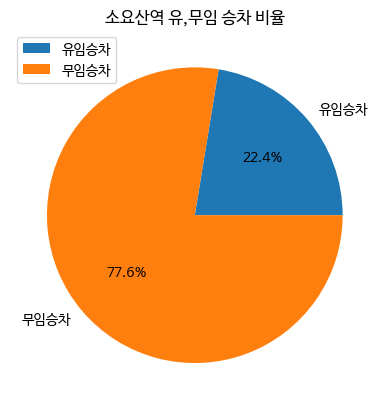

In [ ]:
# 	autopct='%.1f%% : 자동계산
# values	=	[min_row[4],	min_row[6]]
# => [x,y] -> x/(x+y), y/(x+y) 자동 계산

import csv
import matplotlib.pyplot as plt
import platform

f=open('/content/drive/MyDrive/KDT AI, 빅데이터 전문가 양성과정/data/공공데이터/07_29/subwayfee.csv', encoding='utf-8-sig')
data=csv.reader(f)
header=next(data)
print(header)

min_rate=100
min_row=[]
min_total_count=0

for row in data:
  for i in [4,6]:
    row[i] = int(row[i])
  total_count=row[4]+row[6]

  if (row[6]!=0) and (total_count>=10000):
    rate=row[4] / total_count
    if rate <=0.5:
      print(row, round(rate,2))
      if rate < min_rate:
        min_rate=rate
        min_row=row
        min_total_count=total_count

f.close()

print()
print(f'유임 승차 비율이 가장 낮은 역 : {min_row[3]}')
print(f'전체 인원 : {min_total_count: ,}명, '
      f'유임승차인원 : {min_row[4]:,}명, '
      f'유임승차비율 : {round(min_rate*100,1)}%')

plt.title(min_row[3] + "역 유,무임 승차 비율")
label=['유임승차','무임승차']
values=[min_row[4], min_row[6]]
plt.pie(values, labels=label, autopct='%.1f%%')
plt.legend(loc=2) # loc : 범례 위치, 2:upper left
plt.show()



승,하차 인원이 가장 많은 역

In [ ]:
import csv
max=[0]*4
max_station=['']*4
label=['유임승차','유임하차','무임승차','무임하차']

# with : 자동으로 파일 close()
with open('/content/drive/MyDrive/KDT AI, 빅데이터 전문가 양성과정/data/공공데이터/07_29/subwayfee.csv', encoding='utf-8-sig') as f:
  data=csv.reader(f)
  next(data)

  for row in data:
    for i in range(4,8):
      row[i]=int(row[i])
      if row[i] > max[i-4]:
        max[i-4] = row[i]
        max_station[i-4] = row[3] + ' ' + row[1]

for i in range(4):
  print(f'{label[i]} : {max_station[i]} {max[i]:,}명')

유임승차 : 잠실(송파구청) 2호선 2,083,604명
유임하차 : 홍대입구 2호선 2,213,946명
무임승차 : 영등포 경부선 313,931명
무임하차 : 영등포 경부선 314,891명


전체 지하철역 승,하차 인원 분석 및 파이차트 저장

In [ ]:
import csv

label=['유임승차','유임하차','무임승차','무임하차']
color_list=['orange','yellow','pink','purple']
pic_count=0
with open('/content/drive/MyDrive/KDT AI, 빅데이터 전문가 양성과정/data/공공데이터/07_29/subwayfee.csv', encoding='utf-8-sig') as f:
  data=csv.reader(f)
  next(data)

  for row in data:
    for i in range(4,8):
      row[i]=int(row[i])
    print(row)
    plt.figure(dpi=100) # 저장할 그림파일의 dpi (해상도) 설정
    plt.title(row[3] + ' ' + row[1])
    plt.pie(row[4:8], labels=label, colors=color_list, autopct='%.1f%%', shadow=True) # shadow : 그림자
    plt.savefig('/content/drive/MyDrive/KDT AI, 빅데이터 전문가 양성과정/공공데이터/07_26_img/' + row[3] + ' ' + row[1] + '.png')
    plt.close() # 파일 닫기

    pic_count+=1
    if pic_count >=10:
      break

['Jun.24', '1호선', '150', '서울역', 1375235, 1312172, 217760, 208410]
['Jun.24', '1호선', '151', '시청', 623388, 630661, 97573, 95530]
['Jun.24', '1호선', '152', '종각', 914353, 912364, 146932, 137905]
['Jun.24', '1호선', '153', '종로3가', 471522, 426339, 287153, 264801]
['Jun.24', '1호선', '154', '종로5가', 440595, 432871, 248630, 242504]
['Jun.24', '1호선', '155', '동대문', 231365, 226540, 129109, 130444]
['Jun.24', '1호선', '156', '신설동', 287903, 276799, 122597, 118990]
['Jun.24', '1호선', '157', '제기동', 230693, 220271, 262223, 280041]
['Jun.24', '1호선', '158', '청량리(서울시립대입구)', 397655, 379680, 287057, 290189]
['Jun.24', '1호선', '159', '동묘앞', 156165, 161457, 163273, 162912]


시간대별 지하철 이용 인원 수
- 새벽 4시

In [ ]:
import csv

result=[]
total_number=0

with open('/content/drive/MyDrive/KDT AI, 빅데이터 전문가 양성과정/data/공공데이터/07_29/subwaytime.csv', encoding='utf-8-sig') as f:
  data=csv.reader(f)
  next(data)
  next(data) # 2줄의 헤더 정보 건너뜀
  for row in data:
    row[4:]=map(int, row[4:])
    total_number+=row[4]
    result.append(row[4])

print(f'총 지하철 역의 수 : {len(result)}')
print(f'새벽 4시 승차인원 : {total_number:,}')

총 지하철 역의 수 : 622
새벽 4시 승차인원 : 161,079


그래프

새벽 4시 총 승차 인원 수 : 161,079
최대 승차역 : 구로, 인원수 : 13,041


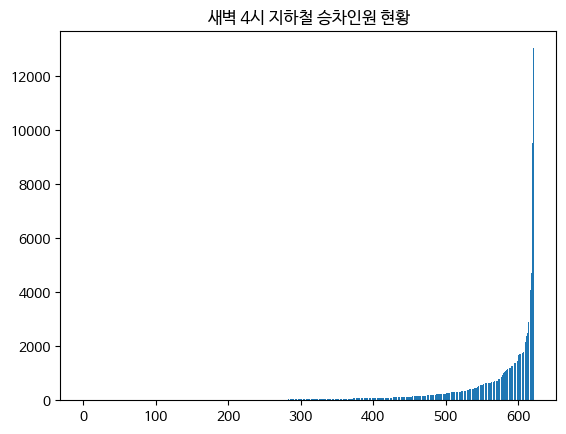

In [ ]:
with open('/content/drive/MyDrive/KDT AI, 빅데이터 전문가 양성과정/data/공공데이터/07_29/subwaytime.csv', encoding='utf-8-sig') as f:
  data=csv.reader(f)
  next(data)
  next(data)
  result=[]
  total_number=0
  max_num=-1
  max_station=''

  for row in data:
    row[4:] = map(int, row[4:])
    total_number+=row[4]
    result.append(row[4])
    if row[4] > max_num:
      max_num=row[4]
      max_station=row[3]

print(f'새벽 4시 총 승차 인원 수 : {total_number:,}')
print(f'최대 승차역 : {max_station}, 인원수 : {max_num:,}')
result.sort()
plt.figure(dpi=100)
plt.bar(range(len(result)), result)
plt.title('새벽 4시 지하철 승차인원 현황')
plt.show()

In [ ]:
import numpy as np

새벽 4시 총 승차 인원 수 : 161,079
최대 승차역 : 구로, 인원수 : 13,041


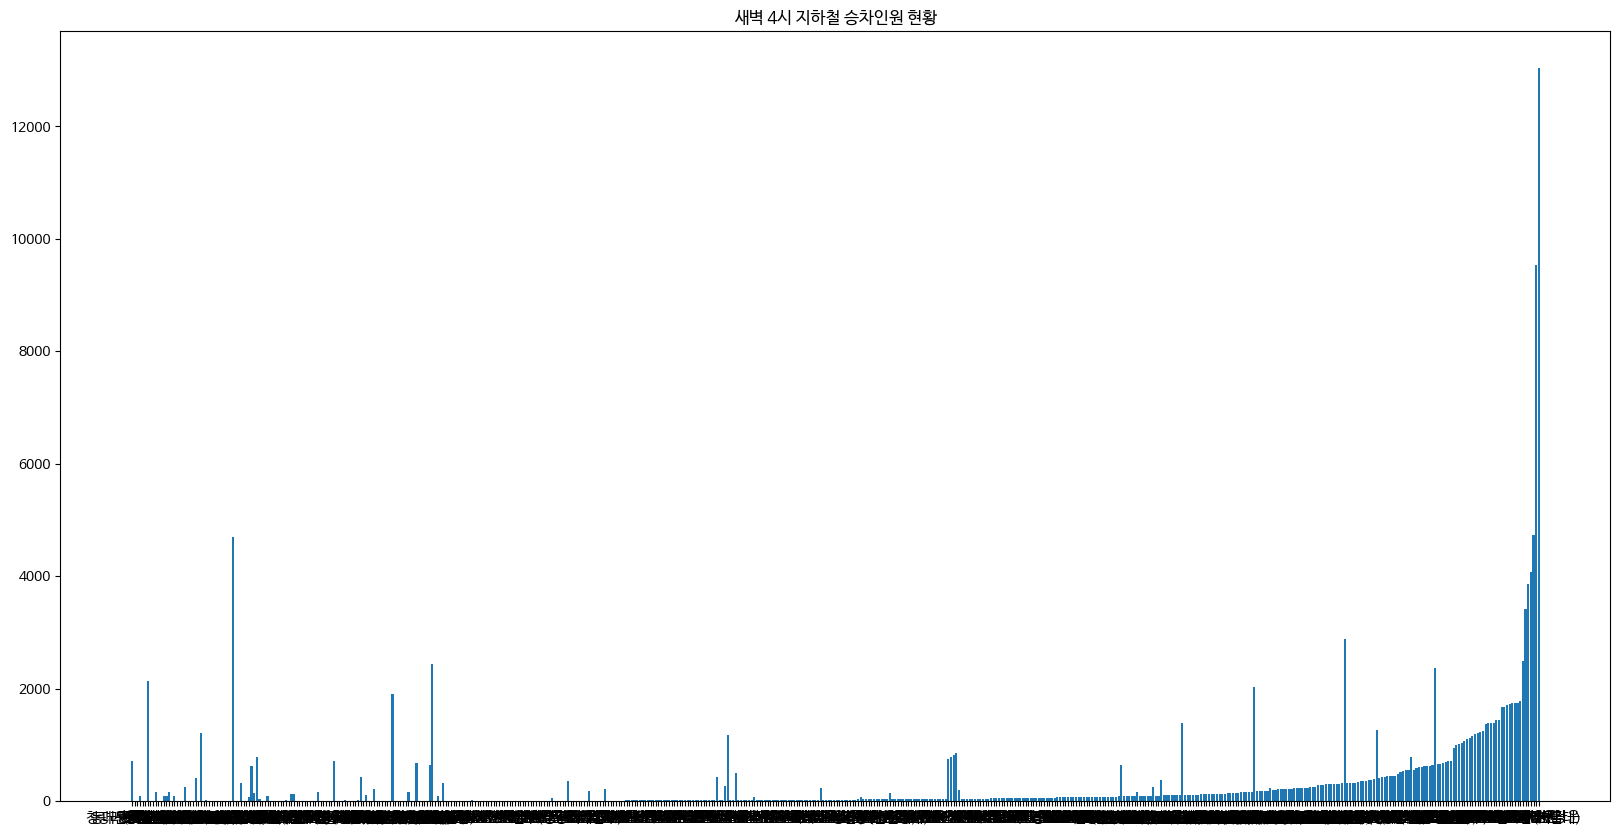

In [ ]:
with open('/content/drive/MyDrive/KDT AI, 빅데이터 전문가 양성과정/data/공공데이터/07_29/subwaytime.csv', encoding='utf-8-sig') as f:
  data=csv.reader(f)
  next(data)
  next(data)
  result=[]
  station=[]
  total_number=0
  max_num=-1
  max_station=''

  for row in data:
    row[4:] = map(int, row[4:])
    total_number+=row[4]
    result.append(row[4])
    station.append(row[3])
    if row[4] > max_num:
      max_num=row[4]
      max_station=row[3]

print(f'새벽 4시 총 승차 인원 수 : {total_number:,}')
print(f'최대 승차역 : {max_station}, 인원수 : {max_num:,}')
result.sort()
plt.figure(dpi=100, figsize=(20,10))
plt.bar(station, result)
plt.title('새벽 4시 지하철 승차인원 현황')
plt.show()

출근 시간대 승차 인원이 많은 10개 역 이름 찾기

[1] : 신림(2호선) 580,615
[2] : 구로디지털단지(2호선) 419,180
[3] : 잠실(송파구청)(2호선) 408,219
[4] : 서울대입구(관악구청)(2호선) 393,990
[5] : 신도림(2호선) 357,135
[6] : 까치산(5호선) 331,049
[7] : 연신내(3호선) 327,882
[8] : 화곡(5호선) 320,069
[9] : 쌍문(4호선) 317,940
[10] : 수유(강북구청)(4호선) 299,724


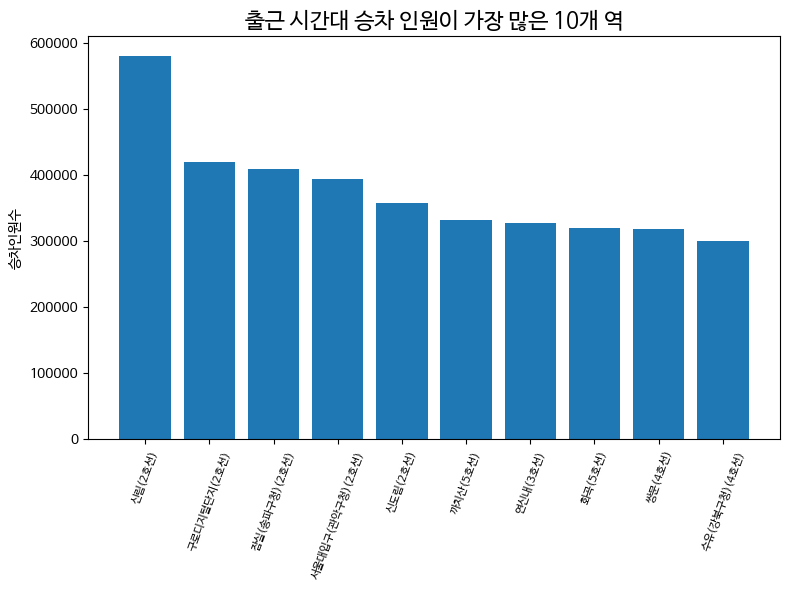

In [ ]:
# 복합 리스트
# station_list =	[]
# -> station_list.append((station_name,	passenger_num))
# [(신림,123456),(대림,4567)....]
#    [0]  [1]




with open('/content/drive/MyDrive/KDT AI, 빅데이터 전문가 양성과정/data/공공데이터/07_29/subwaytime.csv', encoding='utf-8-sig') as f:
  data=csv.reader(f)
  next(data)
  next(data)

  station_list=[]
  max_num=-1
  max_station=''

  for row in data:
    row[4:]=map(int,row[4:])
    passenger_num=sum(row[10:15:2])

    station_name=row[3]+'('+row[1]+')'
    station_list.append((station_name,passenger_num))

sorted_passenger_list=sorted(station_list, key=lambda x:x[1], reverse=True)
# x[1] : 승차인원 기준 내림차순 정렬

index=1
for station in sorted_passenger_list[:10]:
  print(f'[{index}] : {station[0]} {station[1]:,}')
  index+=1

station_name, station_passenger=zip(*sorted_passenger_list[:10])
# station_name,	station_passenger =	zip(*sorted_passenger_list[:10])
# -> zip함수로 연결한 두 리스트를 해제하려면 * 추가

plt.figure(figsize=(8,6))
plt.title('출근 시간대 승차 인원이 가장 많은 10개 역', size=16)
plt.bar(range(len(station_passenger)), station_passenger)
plt.xticks(range(len(station_name)), station_name, rotation=70, fontsize=8)
plt.ylabel('승차인원수')
plt.tight_layout()

plt.show()

시간대별 가장 많이 승차하는
역 정보 분석

[4시:구로]: 13,041
[5시:부천]: 40,934
[6시:신림]: 67,569
[7시:신림]: 172,920
[8시:신림]: 250,103
[9시:신림]: 157,592
[10시:신림]: 91,388
[11시:잠실(송파구청)]: 87,311
[12시:잠실(송파구청)]: 97,515
[13시:잠실(송파구청)]: 107,172
[14시:잠실(송파구청)]: 116,532
[15시:잠실(송파구청)]: 140,539
[16시:잠실(송파구청)]: 166,757
[17시:강남]: 239,429
[18시:강남]: 298,631
[19시:강남]: 197,594
[20시:홍대입구]: 168,814
[21시:홍대입구]: 198,064
[22시:홍대입구]: 191,740
[23시:홍대입구]: 98,253
[0시:홍대입구]: 12,130
[1시:신도림]: 17
[2시:개화]: 4


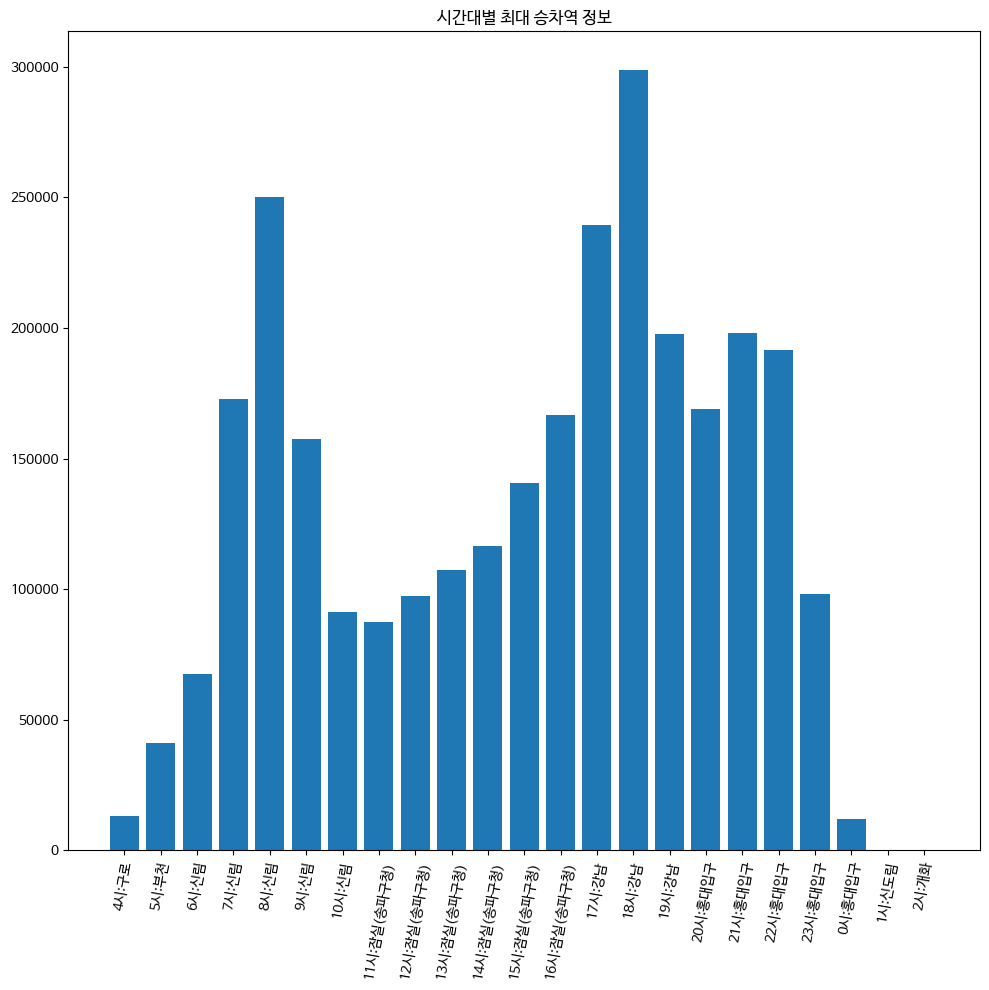

In [ ]:
# row[j	*	2	+	4]	: 승차인원만 구하기 위해 (= 4+(j*2))

with open('/content/drive/MyDrive/KDT AI, 빅데이터 전문가 양성과정/data/공공데이터/07_29/subwaytime.csv', encoding='utf-8-sig') as f:
  data=csv.reader(f)
  next(data)
  next(data)
  max=[0]*23
  max_station=['']*23
  xtick_list=[]

  for i in range(4,27):
    n=i%24
    xtick_list.append(str(n))

  for row in data:
    row[4:]=map(int,row[4:])
    for j in range(23):
      a=row[j*2+4]
      if a>max[j]:
        max[j]=a
        max_station[j]=xtick_list[j]+'시:' +row[3]

  for i in range(len(max)):
    print(f'[{max_station[i]}]: {max[i]:,}')

plt.figure(figsize=(10,10))
plt.title('시간대별 최대 승차역 정보')
plt.bar(range(23),max)
plt.xticks(range(23), labels=max_station, rotation=80)
plt.tight_layout()
plt.show()

모든 지하철역에서 시간대별 승하차 인원

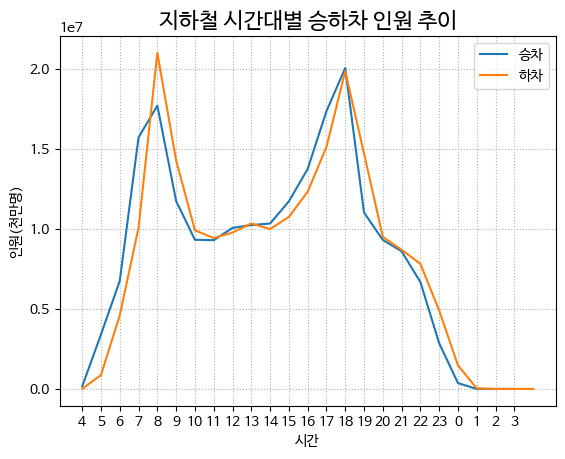

In [32]:
with open('/content/drive/MyDrive/KDT AI, 빅데이터 전문가 양성과정/data/공공데이터/07_29/subwaytime.csv', encoding='utf-8-sig') as f:
  data=csv.reader(f)
  next(data)
  next(data)
  subway_in=[0]*24
  subway_out=[0]*25

  for row in data:
    row[4:]=map(int,row[4:])
    for i in range(24):
      subway_in[i]+=row[4+i*2]
      subway_out[i]+=row[5+i*2]

  xtick_list=[]
  for i in range(4,28):
    n=i%24
    xtick_list.append(str(n))

plt.figure(dpi=100)
plt.title('지하철 시간대별 승하차 인원 추이', size=16)
plt.grid(linestyle=':')
plt.plot(subway_in, label='승차')
plt.plot(subway_out, label='하차')
plt.legend()

plt.xticks(range(24), labels=xtick_list)
plt.xlabel('시간')
plt.ylabel('인원(천만명)')
plt.show()

지하철 시간대별 이용현황 : 엑셀파일

In [30]:
pip install xlrd

In [44]:
import pandas as pd
from tabulate import tabulate

df=pd.read_excel('/content/drive/MyDrive/KDT AI, 빅데이터 전문가 양성과정/data/공공데이터/07_29/subway.xls', sheet_name='지하철 시간대별 이용현황', header=[0,1])
print(df.head())


                 사용월                호선명                역ID               지하철역  \
  Unnamed: 0_level_1 Unnamed: 1_level_1 Unnamed: 2_level_1 Unnamed: 3_level_1   
0            2024-06                1호선                150                서울역   
1            2024-06                1호선                151                 시청   
2            2024-06                1호선                152                 종각   
3            2024-06                1호선                153               종로3가   
4            2024-06                1호선                154               종로5가   

  04:00:00~04:59:59     05:00:00~05:59:59        06:00:00~06:59:59          \
                 승차  하차                승차     하차                승차      하차   
0               654  20             8,727  9,083            13,812  56,637   
1                74   0             2,105  5,374             4,050  25,949   
2               132   7             4,291  5,787             4,312  32,747   
3               206  13             4,296 

In [45]:
print(df.columns)

MultiIndex([(              '사용월',  'Unnamed: 0_level_1'),
            (              '호선명',  'Unnamed: 1_level_1'),
            (              '역ID',  'Unnamed: 2_level_1'),
            (             '지하철역',  'Unnamed: 3_level_1'),
            ('04:00:00~04:59:59',                  '승차'),
            ('04:00:00~04:59:59',                  '하차'),
            ('05:00:00~05:59:59',                  '승차'),
            ('05:00:00~05:59:59',                  '하차'),
            ('06:00:00~06:59:59',                  '승차'),
            ('06:00:00~06:59:59',                  '하차'),
            ('07:00:00~07:59:59',                  '승차'),
            ('07:00:00~07:59:59',                  '하차'),
            ('08:00:00~08:59:59',                  '승차'),
            ('08:00:00~08:59:59',                  '하차'),
            ('09:00:00~09:59:59',                  '승차'),
            ('09:00:00~09:59:59',                  '하차'),
            ('10:00:00~10:59:59',                  '승차'),
            ('

In [46]:
print(df[('호선명','Unnamed: 1_level_1')])

0      1호선
1      1호선
2      1호선
3      1호선
4      1호선
      ... 
617    신림선
618    신림선
619    신림선
620    신림선
621    신림선
Name: (호선명, Unnamed: 1_level_1), Length: 622, dtype: object


In [47]:
print(df[('지하철역', 'Unnamed: 3_level_1')])

0           서울역
1            시청
2            종각
3          종로3가
4          종로5가
         ...   
617          당곡
618          신림
619          서원
620     서울대벤처타운
621    관악산(서울대)
Name: (지하철역, Unnamed: 3_level_1), Length: 622, dtype: object


In [55]:
commute_time_df=df.iloc[:,[1,3,10,12,14]].copy() # 7시, 8시, 9시 승차 인원
print(tabulate(commute_time_df.head(), headers='keys',tablefmt='pretty'))

+---+----------------------------------+------------------------------------+-------------------------------+-------------------------------+-------------------------------+
|   | ('호선명', 'Unnamed: 1_level_1') | ('지하철역', 'Unnamed: 3_level_1') | ('07:00:00~07:59:59', '승차') | ('08:00:00~08:59:59', '승차') | ('09:00:00~09:59:59', '승차') |
+---+----------------------------------+------------------------------------+-------------------------------+-------------------------------+-------------------------------+
| 0 |              1호선               |               서울역               |            40,205             |            68,945             |            68,501             |
| 1 |              1호선               |                시청                |             7,703             |            10,616             |            12,972             |
| 2 |              1호선               |                종각                |             6,588             |            10,892             |            13,

In [56]:
commute_time_df=df.iloc[:,[1,3,10,12,14]].copy()
print(tabulate(commute_time_df.head(), headers='keys',tablefmt='psql'))

+----+------------------------------------+--------------------------------------+---------------------------------+---------------------------------+---------------------------------+
|    | ('호선명', 'Unnamed: 1_level_1')   | ('지하철역', 'Unnamed: 3_level_1')   | ('07:00:00~07:59:59', '승차')   | ('08:00:00~08:59:59', '승차')   | ('09:00:00~09:59:59', '승차')   |
|----+------------------------------------+--------------------------------------+---------------------------------+---------------------------------+---------------------------------|
|  0 | 1호선                              | 서울역                               | 40,205                          | 68,945                          | 68,501                          |
|  1 | 1호선                              | 시청                                 | 7,703                           | 10,616                          | 12,972                          |
|  2 | 1호선                              | 종각                                 | 6,588             

In [37]:
print(df['지하철역', 'Unnamed: 3_level_1'])

0           서울역
1            시청
2            종각
3          종로3가
4          종로5가
         ...   
617          당곡
618          신림
619          서원
620     서울대벤처타운
621    관악산(서울대)
Name: (지하철역, Unnamed: 3_level_1), Length: 622, dtype: object


In [50]:
print(commute_time_df.dtypes)

호선명                Unnamed: 1_level_1    object
지하철역               Unnamed: 3_level_1    object
07:00:00~07:59:59  승차                    object
08:00:00~08:59:59  승차                    object
09:00:00~09:59:59  승차                    object
dtype: object


In [57]:
# – apply(lambda	x	:	x.replace(‘,’,	‘’) -> 산술 연산 하기 위해 object 타입 변환

commute_time_df[('07:00:00~07:59:59', '승차')]=commute_time_df[('07:00:00~07:59:59', '승차')].apply(lambda x:x.replace(',',''))
commute_time_df[('08:00:00~08:59:59', '승차')]=commute_time_df[('08:00:00~08:59:59', '승차')].apply(lambda x:x.replace(',',''))
commute_time_df[('09:00:00~09:59:59', '승차')]=commute_time_df[('09:00:00~09:59:59', '승차')].apply(lambda x:x.replace(',',''))

print(tabulate(commute_time_df.head(), headers='keys', tablefmt='psql'))

+----+------------------------------------+--------------------------------------+---------------------------------+---------------------------------+---------------------------------+
|    | ('호선명', 'Unnamed: 1_level_1')   | ('지하철역', 'Unnamed: 3_level_1')   |   ('07:00:00~07:59:59', '승차') |   ('08:00:00~08:59:59', '승차') |   ('09:00:00~09:59:59', '승차') |
|----+------------------------------------+--------------------------------------+---------------------------------+---------------------------------+---------------------------------|
|  0 | 1호선                              | 서울역                               |                           40205 |                           68945 |                           68501 |
|  1 | 1호선                              | 시청                                 |                            7703 |                           10616 |                           12972 |
|  2 | 1호선                              | 종각                                 |                   

In [59]:
# df.astype({‘컬럼명’ : ‘변경타입’} -> 연산하기 위함

commute_time_df=commute_time_df.astype({('07:00:00~07:59:59', '승차'):'int64'})
commute_time_df=commute_time_df.astype({('08:00:00~08:59:59', '승차'):'int64'})
commute_time_df=commute_time_df.astype({('09:00:00~09:59:59', '승차'):'int64'})

print(commute_time_df.dtypes)

호선명                Unnamed: 1_level_1    object
지하철역               Unnamed: 3_level_1    object
07:00:00~07:59:59  승차                     int64
08:00:00~08:59:59  승차                     int64
09:00:00~09:59:59  승차                     int64
dtype: object


In [60]:
row_sum_df=commute_time_df.sum(axis=1, numeric_only=True)
print(row_sum_df) # df형태
passenger_number_list=row_sum_df.to_list()
print()
print(passenger_number_list)

0      177651
1       31291
2       30858
3       31532
4       31857
        ...  
617     44504
618     14843
619     43187
620     97128
621     17160
Length: 622, dtype: int64

[177651, 31291, 30858, 31532, 31857, 54974, 72748, 78304, 146281, 33398, 26922, 54398, 37437, 29845, 35651, 103532, 138447, 91847, 21195, 60699, 73950, 202190, 246574, 258202, 113257, 408219, 193833, 54710, 55672, 90551, 65118, 149808, 88429, 76231, 74071, 250436, 275209, 393990, 266382, 580615, 288989, 419180, 217925, 357135, 116685, 115497, 127404, 128251, 198477, 126191, 88080, 95515, 51481, 28341, 20530, 18550, 8532, 76175, 114585, 18971, 77834, 204337, 327882, 149949, 183835, 177281, 48139, 49139, 53950, 31659, 11410, 20284, 17, 21996, 85769, 84844, 74303, 61311, 44522, 41434, 126179, 38439, 107172, 113120, 56407, 33983, 74425, 12713, 88809, 66360, 112921, 59805, 64074, 75351, 103233, 196507, 192559, 213813, 317940, 299724, 127844, 239022, 219422, 136144, 89621, 62442, 26358, 39954, 60041, 55118, 27431,

In [61]:
# – 최대값 계산: df.max(axis=0)
# – 최대값 인덱스: df.idxmax()

# 원본 df에서 인덱스 찾음 - row_sum_df에서 찾아도 ㅇ

max_number=row_sum_df.max(axis=0)
print(max_number)

580615


In [63]:
max_index=row_sum_df.idxmax()
max_line,max_station=df.iloc[max_index, [1,3]]

print(f'출근 시간대 최대 승차 인원역 : {max_line} {max_station} {max_number:,}명')

출근 시간대 최대 승차 인원역 : 2호선 신림 580,615명


# 람다

In [66]:
msg	=	"The	health	know	not	of	their	health,	but	only	the	sick"
sorted_list=sorted(msg.split(), key=str.lower)
print(sorted_list)

['but', 'health', 'health,', 'know', 'not', 'of', 'only', 'sick', 'The', 'the', 'their']


In [69]:
msg	=	"The	health	know	not	of	their	health,	but	only	the	sick"
descending_sorted_list=sorted(msg.split(), key=len, reverse=True)
print(descending_sorted_list)

['health,', 'health', 'their', 'know', 'only', 'sick', 'The', 'not', 'but', 'the', 'of']


In [67]:
students	=	[('Alice',	3.9,	20160303),
              ('Bob',	3.0,	20160302),
              ('Charlie',	4.3,	20160301)]

# sorted key 입력 없음
print(sorted(students))

#	학번(students[2])을 기준으로 오름차순 정렬
sorted_student1=sorted(students, key=lambda s:s[2])
print(sorted_student1)

#	학점(students[1])을 기준으로 내림 차순 정렬
sorted_students2=sorted(students, key=lambda s:s[1], reverse=True)
print(sorted_students2)

[('Alice', 3.9, 20160303), ('Bob', 3.0, 20160302), ('Charlie', 4.3, 20160301)]
[('Charlie', 4.3, 20160301), ('Bob', 3.0, 20160302), ('Alice', 3.9, 20160303)]
[('Charlie', 4.3, 20160301), ('Alice', 3.9, 20160303), ('Bob', 3.0, 20160302)]


In [73]:
# def	__repr__(self) : 객체를 문자열로 표현 , 객체를 나타낼 때 주로 사용
# s.name : 멤버를 의미

class Student:
  def __init__(self, name, grade, number):
    self.name=name
    self.grade=grade
    self.number=number

  def __repr__(self):
    return f'({self.name}, {self.grade}, {self.number})'

students=[Student('홍길동',3.9,20240303), Student('김유신',3.0,20240302), Student('박문수',4.3, 20240301)]
print(students[0])

sorted_list=sorted(students, key=lambda s:s.name)
print(sorted_list)

sorted_list=sorted(students, key=lambda s:s.grade)
print(sorted_list)

sorted_list=sorted(students, key=lambda s:s.number)
print(sorted_list)

(홍길동, 3.9, 20240303)
[(김유신, 3.0, 20240302), (박문수, 4.3, 20240301), (홍길동, 3.9, 20240303)]
[(김유신, 3.0, 20240302), (홍길동, 3.9, 20240303), (박문수, 4.3, 20240301)]
[(박문수, 4.3, 20240301), (김유신, 3.0, 20240302), (홍길동, 3.9, 20240303)]


# 딕셔너리

In [ ]:
# addr_aliases : 딕셔너리 -> key : value
# print(addr_aliases.get('부산',	'부산광역시＇))	#	key에 ‘부산’이 없으면 ‘부산광역시’ 리턴
# -> default 값이 부산광역시

# addr_df['시도']=	addr_df['시도'].apply(lambda	v:	addr_aliases.get(v,	v)) -> 없으면 입력된 같은 값으로 리턴